In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Plot de árvore
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import chi2

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm_api

from sklearn import metrics

## Material complementar de leitura para entendimento das features

#### https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf

## Conhecendo o dataset

In [343]:
data = pd.read_csv('/home/silva/Downloads/breast-cancer.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Verificação dos dados

In [344]:
print(data.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


### Ajustando nome das colunas

In [399]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.columns.values)

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave_points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'unnamed:_32']


### Verificando a existência de inconsistências no dataset

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [347]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
unnamed:

In [348]:
df = data.copy()
df = data.drop('unnamed:_32',axis = 1 )
df = df.drop('id',axis = 1 )
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [349]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [350]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

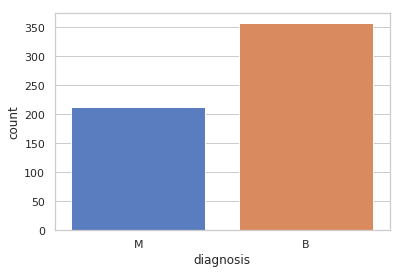

In [351]:
sns.countplot(df['diagnosis'],label="Count") 

## Realizando Balanceamento dos Dados

In [352]:
#Counting registry number of each class 
b_count, m_count = df['diagnosis'].value_counts()

#Splitting by class
df_b = df[df['diagnosis'] == 'B']
df_m = df[df['diagnosis'] == 'M']

#Cutting dataset for "under-sampling"
df_b = df_b.sample(m_count)

#Re-join
df_manipulated = pd.concat([df_b, df_m], axis=0)

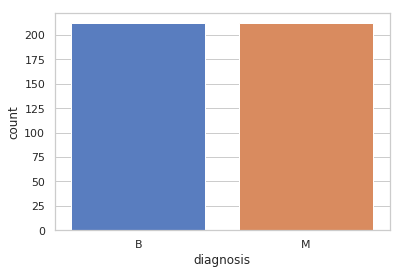

In [353]:
sns.countplot(df_manipulated['diagnosis'],label="Count") 

## Explorando o dataset

### Conhecendo os dados

In [354]:
df_manipulated.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,...,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,14.743571,19.738019,96.347241,716.374292,0.097380,0.113528,0.103946,0.056657,0.183502,0.062975,...,17.189613,26.363774,113.862712,985.757547,0.134703,0.281978,0.310975,0.128196,0.297556,0.086078
std,3.779807,4.224250,26.061534,382.082877,0.013926,0.055545,0.083396,0.041254,0.027613,0.007125,...,5.189179,6.153993,35.983318,619.488955,0.023332,0.167271,0.217056,0.068455,0.065844,0.019126
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.023440,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.870000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.865000,16.670000,76.742500,432.525000,0.086917,0.070777,0.035805,0.023848,0.164100,0.057607,...,13.230000,21.822500,86.007500,539.350000,0.119450,0.162750,0.139800,0.078500,0.255675,0.073065
50%,14.050000,19.345000,91.495000,609.500000,0.097175,0.106750,0.086575,0.048405,0.180950,0.061800,...,16.110000,26.040000,106.400000,787.950000,0.133800,0.246850,0.286600,0.121800,0.285450,0.081315
75%,17.312500,22.150000,114.200000,931.450000,0.106425,0.143000,0.152550,0.086260,0.197650,0.066705,...,20.585000,30.572500,137.950000,1302.500000,0.149550,0.373825,0.429650,0.182000,0.323575,0.096080
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Normalização para plotagem

In [355]:
def standardized(df_features):
    df_standardized = (df_features - df_features.mean()) / (df_features.std()) 
    return df_standardized

def plot_boxplot(df_class, df_features_standardized, w, h):
    df_standardized = pd.concat([df_class,df_features_standardized],axis=1)
    df_melted = pd.melt(df_standardized,
                    id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
    plt.figure(figsize=(w,h))
    sns.boxplot(x="features", y="value", hue="diagnosis", data=df_melted)

### Verificando cada uma das features

In [400]:
df_class = df_manipulated.diagnosis 
df_features = df_manipulated.drop('diagnosis', axis=1)
df_standardized = standardized(df_features)

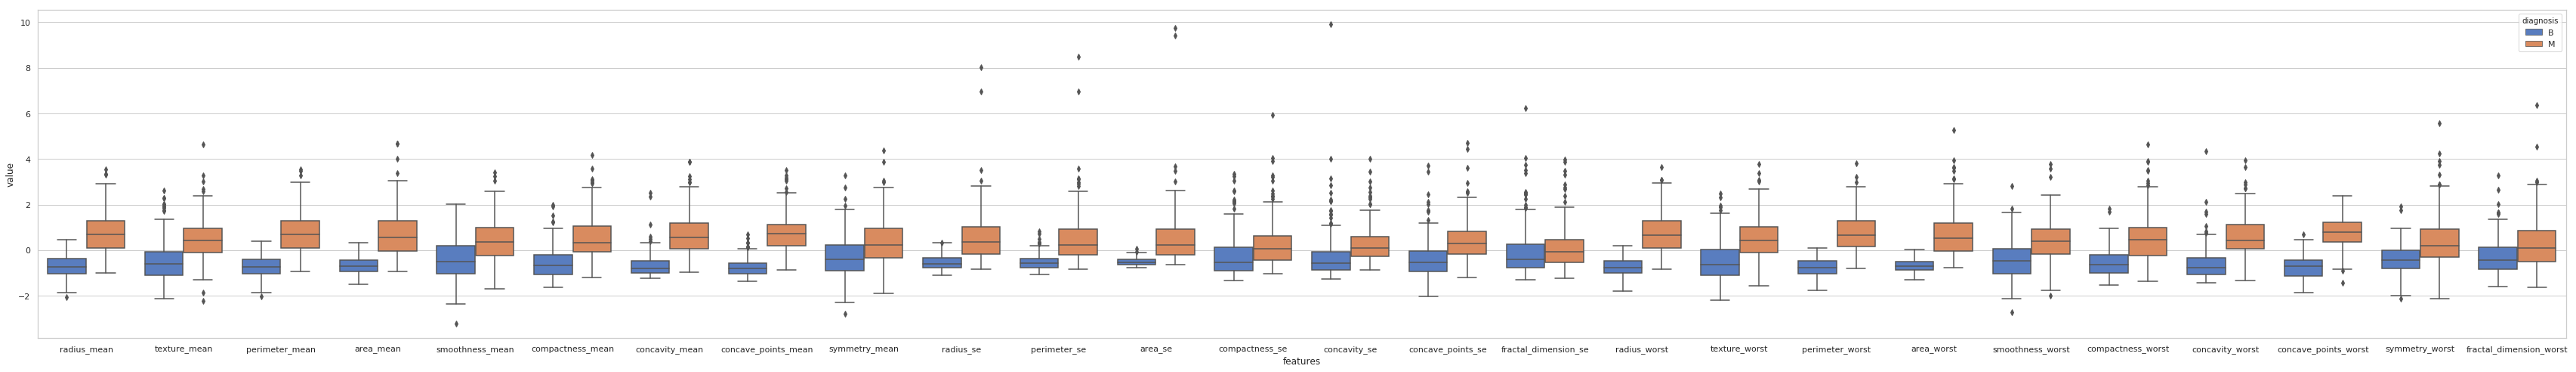

In [401]:
plot_boxplot(df_class, df_standardized, 60, 8)

#### Removendo Colunas com baixa variação entre as populações

In [402]:
columns_without_variation = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']
columns_without_variation

['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se']

In [359]:
df_manipulated = df_manipulated.drop(columns=columns_without_variation)
df_manipulated.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
159,B,10.90,12.96,68.69,366.8,0.07515,0.03718,0.003090,0.006588,0.1442,...,12.36,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685
522,B,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613


In [360]:
corr = df_manipulated.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.349361,0.997815,0.987273,0.213517,0.503026,0.694519,0.832781,0.158156,0.699855,...,0.967374,0.304990,0.963376,0.938940,0.123503,0.377306,0.513998,0.743318,0.131219,-0.024199
texture_mean,0.349361,1.000000,0.355453,0.341268,0.017760,0.263746,0.335715,0.326434,0.073006,0.286370,...,0.376929,0.904152,0.382430,0.362321,0.112706,0.295074,0.327798,0.327462,0.097276,0.125910
perimeter_mean,0.997815,0.355453,1.000000,0.985864,0.250853,0.554278,0.734050,0.860729,0.194673,0.710955,...,0.966567,0.311210,0.968179,0.938153,0.153528,0.419957,0.551177,0.769853,0.156007,0.018742
area_mean,0.987273,0.341268,0.985864,1.000000,0.210833,0.487009,0.696434,0.827407,0.154572,0.749888,...,0.958799,0.289038,0.955291,0.955632,0.119603,0.347660,0.492522,0.714181,0.104774,-0.036484
smoothness_mean,0.213517,0.017760,0.250853,0.210833,1.000000,0.682297,0.576269,0.586560,0.560896,0.305520,...,0.253105,0.089350,0.280572,0.235923,0.805342,0.514789,0.491128,0.547178,0.409624,0.516189
compactness_mean,0.503026,0.263746,0.554278,0.487009,0.682297,1.000000,0.888519,0.825558,0.620664,0.480571,...,0.525465,0.268723,0.583258,0.491753,0.559564,0.861199,0.816444,0.810973,0.500515,0.665936
concavity_mean,0.694519,0.335715,0.734050,0.696434,0.576269,0.888519,1.000000,0.929496,0.509783,0.628434,...,0.696652,0.322076,0.740159,0.676824,0.461824,0.741433,0.873475,0.862654,0.391758,0.469986
concave_points_mean,0.832781,0.326434,0.860729,0.827407,0.586560,0.825558,0.929496,1.000000,0.467145,0.694267,...,0.833752,0.316444,0.860557,0.806748,0.448770,0.641712,0.741650,0.906218,0.349847,0.329728
symmetry_mean,0.158156,0.073006,0.194673,0.154572,0.560896,0.620664,0.509783,0.467145,1.000000,0.279501,...,0.193075,0.100557,0.228099,0.176819,0.429997,0.496661,0.447459,0.439601,0.721484,0.445009
radius_se,0.699855,0.286370,0.710955,0.749888,0.305520,0.480571,0.628434,0.694267,0.279501,1.000000,...,0.730879,0.196233,0.736164,0.764411,0.127706,0.258308,0.363071,0.527779,0.063133,-0.000426


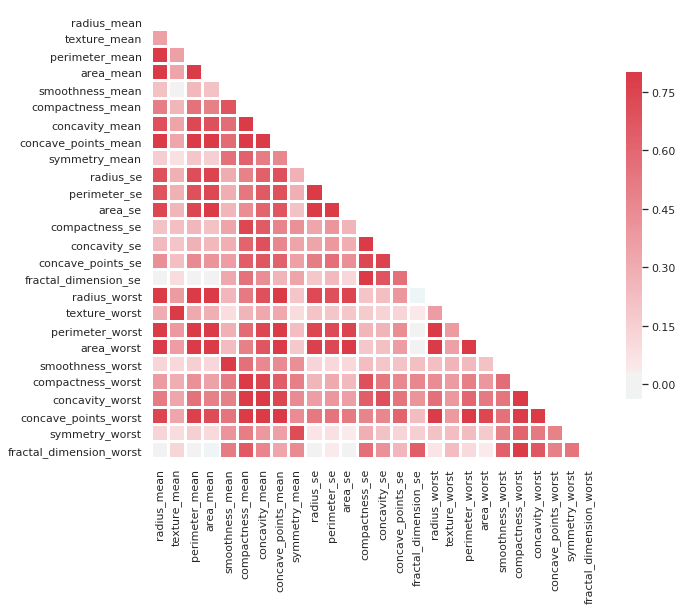

In [361]:
# Generate a mask for the upper triangle
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .4})

### Filtrando algumas medidas no dataset

In [408]:
high_correlated_columns = ["radius_se", "perimeter_se", "area_se", "compactness_se", "concavity_se", "concave_points_se", "fractal_dimension_se", "texture_se", "smoothness_se", "symmetry_se", "radius_worst", "perimeter_worst", "area_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "fractal_dimension_worst", "texture_worst", "smoothness_worst", "symmetry_worst"]
df_filtered = df.drop(high_correlated_columns, axis=1)
df_filtered.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999


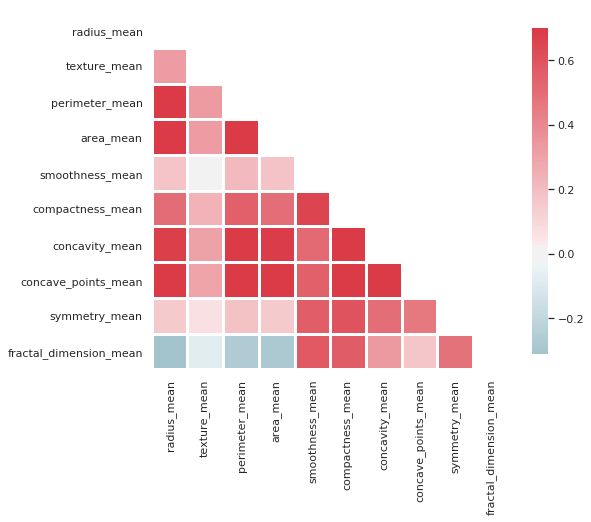

In [409]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(df_filtered.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_filtered.corr(), mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .6})

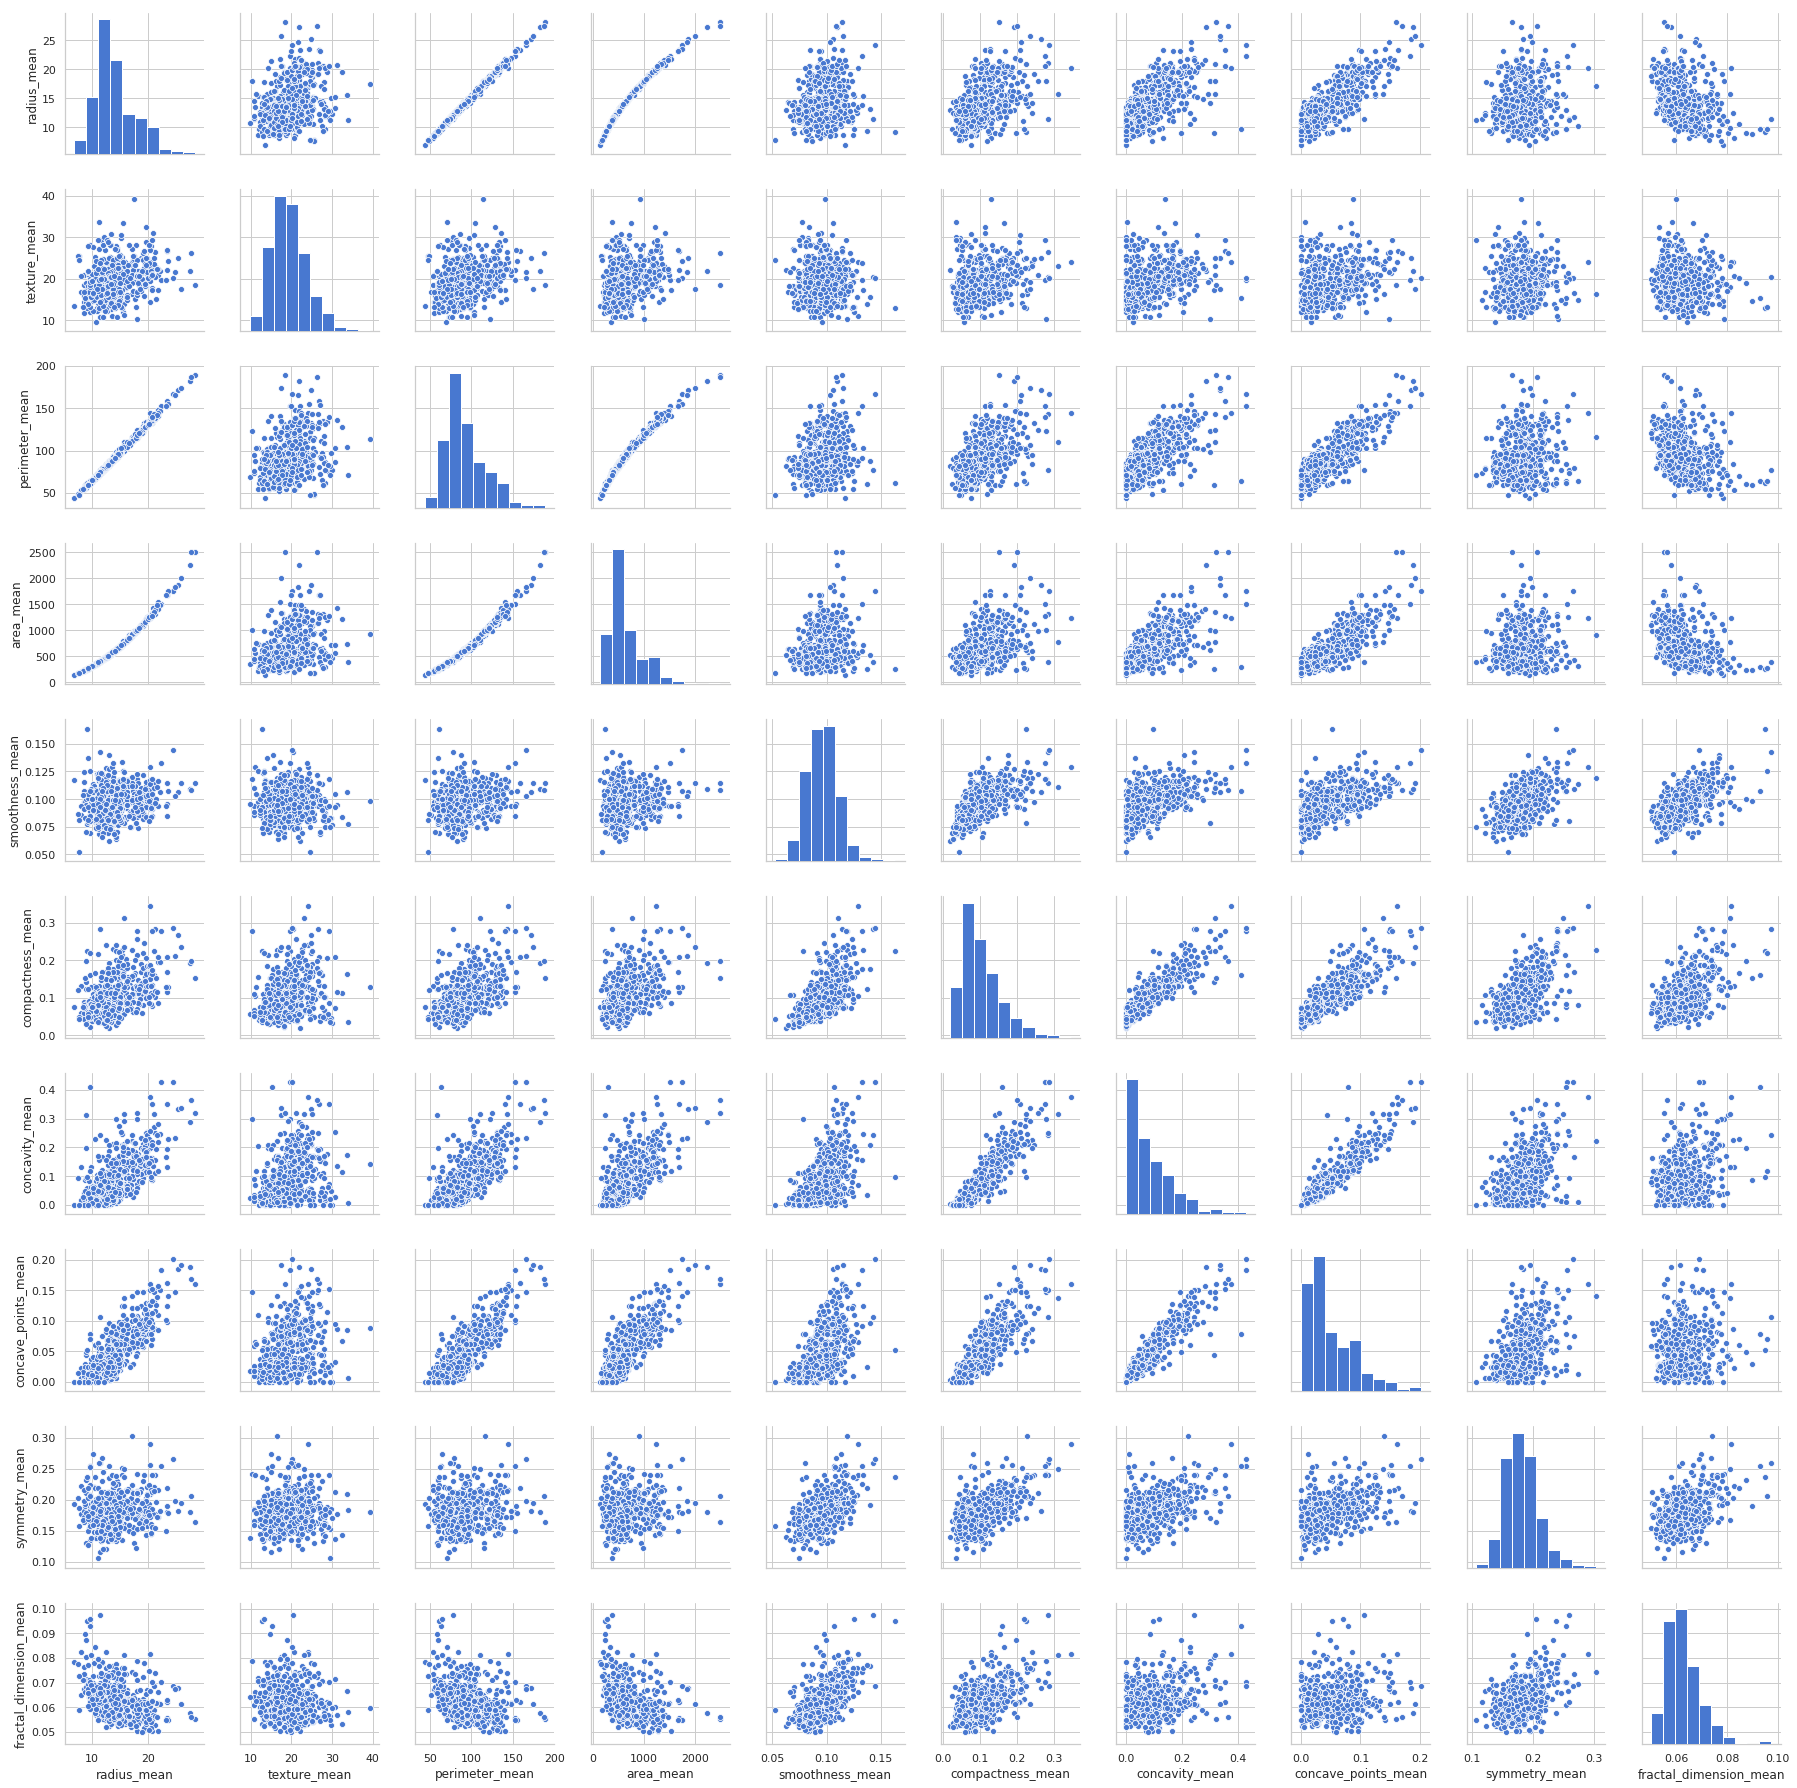

In [410]:
sns.pairplot(df_filtered)

### Conclusões: 
#### - Área e perímetro são altamente correlacionadas
#### - Área e perímetro são altamente correlacionadas

## Hipóteses

### 1) Há diferença significativa de variação no raio do tumor, entre a população com maligno e  benigno?

#### "The radius of an individual nucleus is measured by averaging the length of the radial line segments dened by the centroid of the snake and the individual snake points." (https://pdfs.semanticscholar.org/1c4a/4db612212a9d3806a848854d20da9ddd0504.pdf)

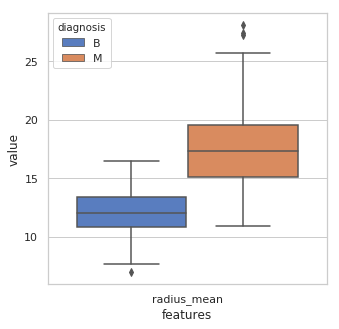

In [411]:
plot_boxplot(df_class, df_manipulated['radius_mean'], 5, 5)

In [412]:
sns.set(style="whitegrid", palette="muted")
df_melted = pd.melt(df_manipulated,
                    id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

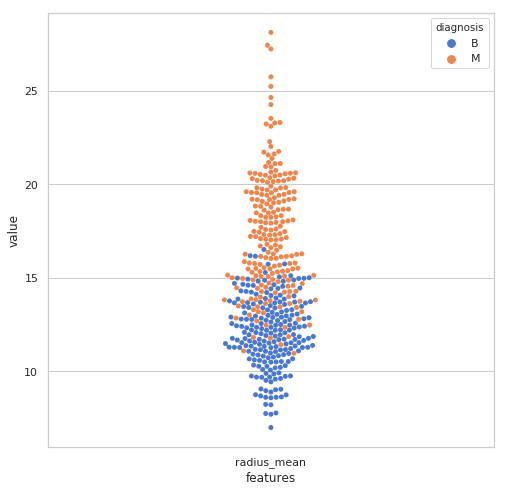

In [413]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="features", y="value", hue="diagnosis",data=df_melted[df_melted['features'] == 'radius_mean'])

#### Teste Anova

In [414]:
def make_diagnosis_binary(x):
    if x == 'M':
        return 1
    return 0
df_ols = df_manipulated.copy()
df_ols['binary_diagnosis'] = df_ols['diagnosis'].apply(make_diagnosis_binary)
model = ols('binary_diagnosis ~ radius_mean',data=df_ols).fit()
aov_table = sm.stats.anova_lm(model, fit=2)
print(aov_table)

                df    sum_sq    mean_sq          F        PR(>F)
radius_mean    1.0  54.99123  54.991230  454.94724  5.059571e-69
Residual     422.0  51.00877   0.120874        NaN           NaN


#### Conclusão: Ao nível de significância de 5%, podemos afirmar que o tamanho do raio é um diferencial no diagnóstico, havendo uma forte relaçao.

### 2) É possível determinar a classe do tumor, apenas a partir do raio?

In [415]:
df_for_inference = df_manipulated[['radius_mean', 'diagnosis']]
x_inf = df_for_inference.drop('diagnosis',axis=1)
y_inf = df_for_inference['diagnosis']
x_train_inf, x_test_inf, y_train_inf, y_test_inf = train_test_split(x_inf, y_inf, train_size=0.20, random_state=101)
dtc_inf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=1, max_features=1,)

In [416]:
dtc_inf = dtc_inf.fit(x_train_inf, y_train_inf)
dtc_inf.score(x_test_inf, y_test_inf)

0.8529411764705882

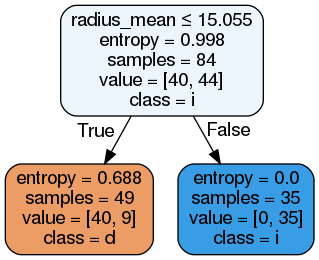

In [417]:
dot_data = StringIO()
tree.export_graphviz(dtc_inf, 
                out_file=dot_data,  
                feature_names=list(x_inf.columns.values),
                class_names= 'diagnosis',
                filled=True, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

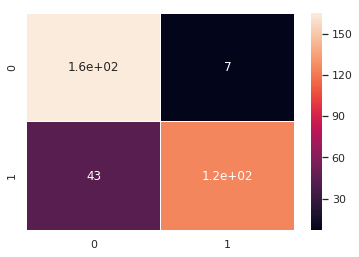

In [418]:
cm_inf = confusion_matrix(y_test_inf, dtc_inf.predict(x_test_inf))
sns.heatmap(cm_inf, linewidths=.5, annot=True, yticklabels=True)

In [419]:
cm_inf

array([[165,   7],
       [ 43, 125]])

In [420]:
a = cm_inf.reshape(1,4) 
array_gotten = [a[0,0], a[0,1], a[0,2], a[0,3]]
array_expected = [array_gotten[0]+ array_gotten[1], 0, 0, array_gotten[2]+array_gotten[3]]
stats.f_oneway(array_gotten,array_expected)


F_onewayResult(statistic=0.0, pvalue=1.0)

In [421]:
metrics.accuracy_score(dtc_inf.predict(x_test_inf),y_test_inf)

0.8529411764705882

### Conclusão
#### A acurácia do modelo usando radius_mean é de 85%, porém há um desbalanceamento entre falso-positivos e falso-negativos

### 3) Quais são os fatores mais fortes para determinação de câncer?

In [422]:
dfols = pd.DataFrame(columns=['column','sum_sq', 'p', 'eff'])
dfols_index = 0

def make_diagnosis_binary(x):
    if x == 'M':
        return 1
    return 0
df_eff = df_manipulated.copy()
df_eff['binary_diagnosis'] = df_ols['diagnosis'].apply(make_diagnosis_binary)

for column in df_manipulated.select_dtypes(include=['int64', 'float64']).columns:
    aov_table = sm_api.stats.anova_lm(ols('binary_diagnosis ~ {0}'.format(column),data=df_eff).fit(), typ=2)
    a = sm_api.OLS(df_eff['binary_diagnosis'], sm_api.add_constant(df_eff[column])).fit()
    a_eff = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    dfols.loc[dfols_index] = [column,
                              aov_table['sum_sq'][0],
                              round(aov_table['PR(>F)'][0], 2),
                              round(a_eff,4)
                             ]
    dfols_index = dfols_index + 1
    
print("Os 5 Fatores com efeito mais forte (eff):")
print(dfols.sort_values('eff', ascending=[False]).head(5))

Os 5 Fatores com efeito mais forte (eff):
                  column     sum_sq    p     eff
23  concave_points_worst  66.218194  0.0  0.6247
18       perimeter_worst  62.091893  0.0  0.5858
16          radius_worst  61.414603  0.0  0.5794
7    concave_points_mean  61.293330  0.0  0.5782
2         perimeter_mean  56.580570  0.0  0.5338


### Melhor feature: concave_points_worst

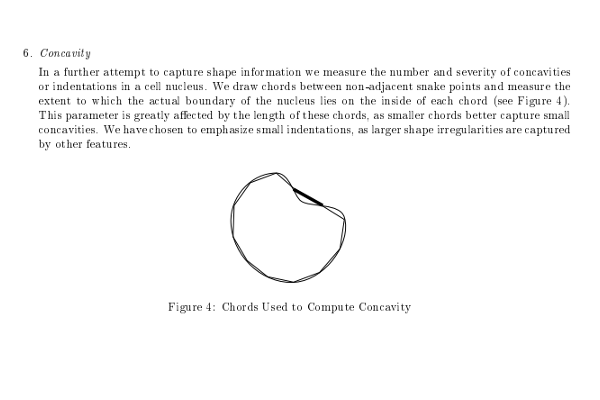

## Criando modelo a partir das 3 melhores features 

### Verificando as correlações

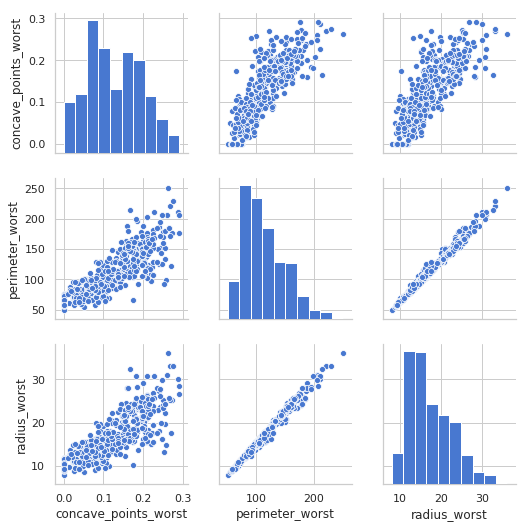

In [431]:
sns.pairplot(df_manipulated[['concave_points_worst', 'perimeter_worst', 'radius_worst']])

###  Raio e perímetro se mostraram muito correlacionadas, por isto foi retirado devido ao menor efeito na regressão anterior

In [434]:
print(sm_api.OLS(df_features['perimeter_worst'], sm_api.add_constant(df_features['radius_worst'])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        perimeter_worst   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.082e+04
Date:                Sat, 27 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:46:58   Log-Likelihood:                -1207.8
No. Observations:                 424   AIC:                             2420.
Df Residuals:                     422   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.5275      0.704     -6.428   

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


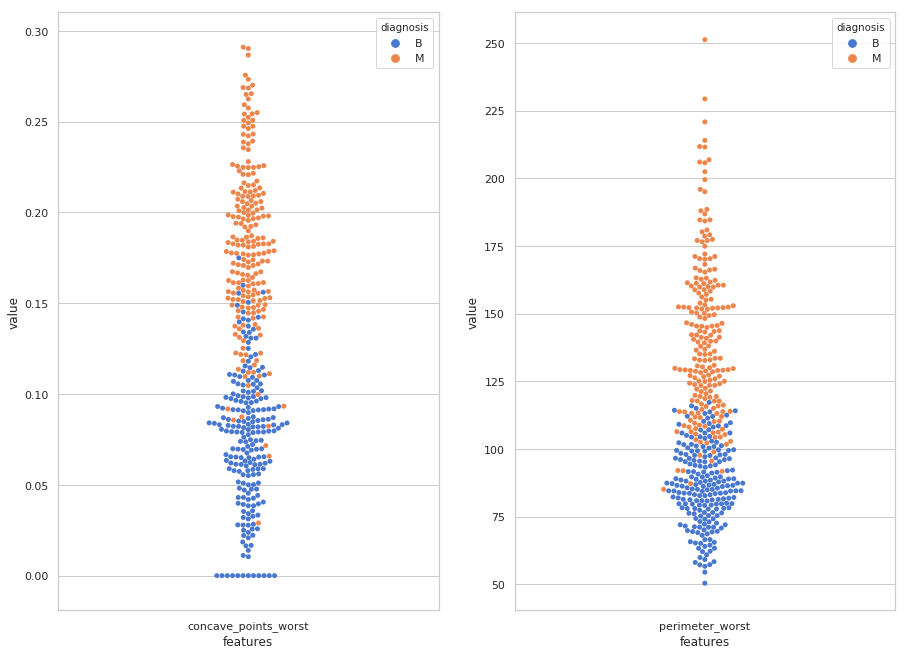

In [424]:
sns.set(style="whitegrid", palette="muted")
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15, 11)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=df_melted[df_melted['features'] == 'concave_points_worst'], ax=ax[0])
sns.swarmplot(x="features", y="value", hue="diagnosis", data=df_melted[df_melted['features'] == 'perimeter_worst'], ax=ax[1])
fig.show()

In [425]:
model = ols('binary_diagnosis ~ concave_points_worst + perimeter_worst',data=df_ols).fit()
aov_table = sm.stats.anova_lm(model, fit=2)
print(aov_table)

                         df     sum_sq    mean_sq           F        PR(>F)
concave_points_worst    1.0  66.218194  66.218194  793.804112  6.371029e-99
perimeter_worst         1.0   4.662487   4.662487   55.892514  4.482516e-13
Residual              421.0  35.119319   0.083419         NaN           NaN


### Utilizando árvore de decisão como modelo

In [427]:
df_for_inference = df_manipulated[['diagnosis', 'concave_points_worst','perimeter_worst']]
x_inf = df_for_inference.drop('diagnosis',axis=1)
y_inf = df_for_inference['diagnosis']
x_train_inf, x_test_inf, y_train_inf, y_test_inf = train_test_split(x_inf, y_inf, train_size=0.20, random_state=101)
dtc_inf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=2, max_features=1)
dtc_inf = dtc_inf.fit(x_train_inf, y_train_inf)
dtc_inf.score(x_test_inf, y_test_inf)

0.9235294117647059

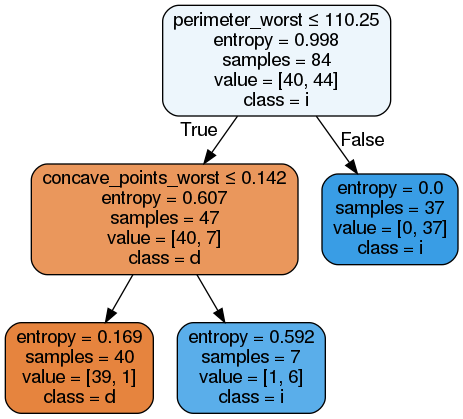

In [428]:
dot_data = StringIO()
tree.export_graphviz(dtc_inf, 
                out_file=dot_data,  
                feature_names=list(x_inf.columns.values),
                class_names= 'diagnosis',
                filled=True, 
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

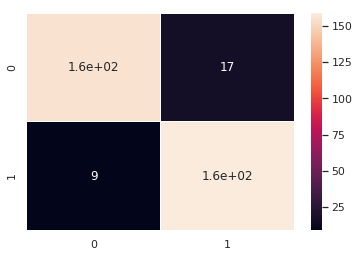

In [429]:
cm_inf = confusion_matrix(y_test_inf, dtc_inf.predict(x_test_inf))
sns.heatmap(cm_inf, linewidths=.5, annot=True, yticklabels=True)

In [430]:
print(cm_inf)

[[155  17]
 [  9 159]]
